# Probability

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})
from scipy.stats import binom
import pandas as pd

## Load the data on dice rolls from the very first class

In [2]:
df = pd.DataFrame(index=['%d or %d' % (x,x+1) for x in range(3,18,2)],
             columns=['Students (observed)'],
             data=[0,1,3,6,5,9,1,1])
df.index.name = 'Roll'
df

,Students (observed)
Roll,
3 or 4,0
5 or 6,1
7 or 8,3
9 or 10,6
11 or 12,5
13 or 14,9
15 or 16,1
17 or 18,1


## Compute the observed probabilities (normalized counts)

In [3]:
n_students = df['Students (observed)'].sum()
df['Probabilty (observed)'] = df['Students (observed)']/n_students
df

,Students (observed),Probabilty (observed)
Roll,,
3 or 4,0,0.000000
5 or 6,1,0.038462
7 or 8,3,0.115385
9 or 10,6,0.230769
11 or 12,5,0.192308
13 or 14,9,0.346154
15 or 16,1,0.038462
17 or 18,1,0.038462


## Extract the low and high values for each 'bin'

In [4]:
df['low'] = [int(name.split()[0]) for name in df.index.values]
df['high'] = [int(name.split()[2]) for name in df.index.values]
df['Students (expected)'] = ''
df['Probability (expected)'] = ''
df

,Students (observed),Probabilty (observed),low,high,Students (expected),Probability (expected)
Roll,,,,,,
3 or 4,0,0.000000,3,4,,
5 or 6,1,0.038462,5,6,,
7 or 8,3,0.115385,7,8,,
9 or 10,6,0.230769,9,10,,
11 or 12,5,0.192308,11,12,,
13 or 14,9,0.346154,13,14,,
15 or 16,1,0.038462,15,16,,
17 or 18,1,0.038462,17,18,,


## Directly computing the theoretical probabilities is beyond the scope of this class
### But we can always simulate!

In [5]:
dice_min = 1
dice_max = 6
n_simulations = 10000
simulated_dice_rolls = np.random.randint(dice_min,
                                         dice_max+1,
                                         (n_simulations,3))
simulated_dice_rolls

array([[6, 2, 1],
       [5, 1, 3],
       [1, 3, 3],
       ..., 
       [5, 6, 3],
       [5, 2, 6],
       [6, 6, 4]])

In [6]:
simulated_totals = simulated_dice_rolls.sum(axis=1)
simulated_totals

array([ 9,  9,  7, ..., 14, 13, 16])

## Extract the number of times (and the probability with which) each roll total occurred in the simulation

In [7]:
unique, counts = np.unique(simulated_totals, return_counts=True)
df_unique = pd.DataFrame(index=unique,columns=['Count'],data=counts)
df_unique.index.title = 'Roll'
df_unique['Probability (expected)'] = df_unique['Count']/n_simulations
df_unique

,Count,Probability (expected)
3,42,0.0042
4,143,0.0143
5,275,0.0275
6,458,0.0458
7,744,0.0744
8,919,0.0919
9,1128,0.1128
10,1306,0.1306
11,1318,0.1318
12,1084,0.1084


## Join the tables on the matching column values

In [8]:
df_combined = df.join(df_unique['Probability (expected)'],on='low',rsuffix='_low').\
                 join(df_unique['Probability (expected)'],on='high',rsuffix='_high')
df_combined

,Students (observed),Probabilty (observed),low,high,Students (expected),Probability (expected),Probability (expected)_low,Probability (expected)_high
Roll,,,,,,,,
3 or 4,0,0.000000,3,4,,,0.0042,0.0143
5 or 6,1,0.038462,5,6,,,0.0275,0.0458
7 or 8,3,0.115385,7,8,,,0.0744,0.0919
9 or 10,6,0.230769,9,10,,,0.1128,0.1306
11 or 12,5,0.192308,11,12,,,0.1318,0.1084
13 or 14,9,0.346154,13,14,,,0.1009,0.0681
15 or 16,1,0.038462,15,16,,,0.0458,0.0247
17 or 18,1,0.038462,17,18,,,0.0143,0.0045


## Add up the probabilities within a bin and get rid of the chaff

In [9]:
df_combined['Probability (expected)'] = df_combined['Probability (expected)_low']+df_combined['Probability (expected)_high']
df_combined['Students (expected)'] = df_combined['Probability (expected)']*n_students
df_combined = df_combined.drop(['low','high','Probability (expected)_low','Probability (expected)_high'],axis=1)
df_combined

,Students (observed),Probabilty (observed),Students (expected),Probability (expected)
Roll,,,,
3 or 4,0,0.000000,0.4810,0.0185
5 or 6,1,0.038462,1.9058,0.0733
7 or 8,3,0.115385,4.3238,0.1663
9 or 10,6,0.230769,6.3284,0.2434
11 or 12,5,0.192308,6.2452,0.2402
13 or 14,9,0.346154,4.3940,0.1690
15 or 16,1,0.038462,1.8330,0.0705
17 or 18,1,0.038462,0.4888,0.0188


## Plot the observed vs expected counts

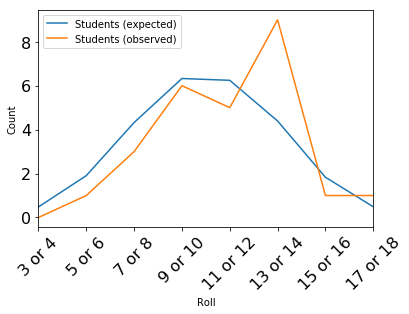

In [16]:
final_answer = df_combined[['Students (expected)','Students (observed)']]
final_answer.plot(rot=45,xticks=range(8),fontsize=16)
plt.ylabel('Count');

## Bonus: perform a chi-squared test and get a p-value

In [17]:
o = final_answer['Students (observed)']
e = final_answer['Students (expected)']
chi_squared = np.sum(((o-e)**2)/e)
dof = 8 - 1 # 8 categories
from scipy.stats import chi2
p = 1-chi2.cdf(chi_squared,dof)
print(("A chi-squared test gives a chi-squared test statistic of %.2f with %d degrees "
       "of freedom for a p-value of %.3f") % (chi_squared,dof,p))

A chi-squared test gives a chi-squared test statistic of 7.32 with 7 degrees of freedom for a p-value of 0.396


# Beware of p-values!!!

![xkcd-significant](https://imgs.xkcd.com/comics/significant.png)